In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
sns.set(rc={'figure.figsize':(30,30)})
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.ensemble import StackingRegressor
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
import keras
import tensorflow as tf
np.set_printoptions(suppress=True)
from sklearn.metrics import mean_squared_error, r2_score

Using TensorFlow backend.


## 1. Train Test Split

In [2]:
df = pd.read_csv('df_final')
df

,Code,Name,score,Acetaldehyde,Acidity,Astringent,Biscuity,Bitterness,Body,Bready,Brett,Caramel,Carbonation,Cereal,Chocolate,Coffee,Colour/ Haze,DMS,Diacetyl,Dried Fruit,Earthy,Esters,Floral,Fruit -Berry,Fruit -Citrus,Fruit -Stone,Fruit- Melon,Fruit-Tropical,Grassy,Herbaceous,Intensity of Aroma,Intensity of Flavour,Length of Aftertaste,Metallic,Mineral,Nutty,Overall Liking,Oxidized,Phenolic,Phenols,Roasted,Skunky,Spicy,Sulphur,Sweetness,Vegetal,Woody,bitter,sour,sweet,carbonation,fruity,citrus,sweet/creamy,Cereal/grain,chocolate,savory
0,308,Emily,5,0.25,3.000000,0.750000,2.750000,3.750000,4.250000,2.750000,0.000000,3.250000,4.250000,2.000000,0.500000,0.75,3.000000,0.000000,0.250000,2.500000,0.750000,0.500000,0.750000,0.500000,1.750000,1.250000,0.250000,0.500000,1.000000,1.000000,3.750000,3.750000,3.250000,1.750000,0.250000,1.750000,4.000000,1.000000,1.000000,1.250000,2.000000,0.000000,1.250000,0.000000,4.500000,1.000000,1.750000,0.0,4.0,5.0,3.0,3.0,0.0,0.0,0.0,1.0,2.0
1,308,Pat,4,0.25,3.000000,0.750000,2.750000,3.750000,4.250000,2.750000,0.000000,3.250000,4.250000,2.000000,0.500000,0.75,3.000000,0.000000,0.250000,2.500000,0.750000,0.500000,0.750000,0.500000,1.750000,1.250000,0.250000,0.500000,1.000000,1.000000,3.750000,3.750000,3.250000,1.750000,0.250000,1.750000,4.000000,1.000000,1.000000,1.250000,2.000000,0.000000,1.250000,0.000000,4.500000,1.000000,1.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,308,Sarah M.,4,0.25,3.000000,0.750000,2.750000,3.750000,4.250000,2.750000,0.000000,3.250000,4.250000,2.000000,0.500000,0.75,3.000000,0.000000,0.250000,2.500000,0.750000,0.500000,0.750000,0.500000,1.750000,1.250000,0.250000,0.500000,1.000000,1.000000,3.750000,3.750000,3.250000,1.750000,0.250000,1.750000,4.000000,1.000000,1.000000,1.250000,2.000000,0.000000,1.250000,0.000000,4.500000,1.000000,1.750000,2.0,1.0,4.0,2.0,2.0,3.0,0.0,0.0,0.0,1.0
3,308,Geoff,3,0.25,3.000000,0.750000,2.750000,3.750000,4.250000,2.750000,0.000000,3.250000,4.250000,2.000000,0.500000,0.75,3.000000,0.000000,0.250000,2.500000,0.750000,0.500000,0.750000,0.500000,1.750000,1.250000,0.250000,0.500000,1.000000,1.000000,3.750000,3.750000,3.250000,1.750000,0.250000,1.750000,4.000000,1.000000,1.000000,1.250000,2.000000,0.000000,1.250000,0.000000,4.500000,1.000000,1.750000,5.0,0.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,3.0
4,161,Emily,4,0.00,3.666667,0.333333,1.666667,3.666667,5.000000,2.000000,0.333333,2.333333,6.000000,2.000000,0.000000,0.00,4.333333,0.333333,0.333333,0.666667,0.000000,2.333333,1.333333,0.333333,2.666667,1.000000,0.666667,0.666667,1.666667,1.000000,4.333333,5.000000,3.666667,0.333333,0.333333,1.666667,4.000000,0.333333,0.666667,2.000000,0.000000,0.333333,2.000000,0.333333,4.666667,0.000000,1.000000,0.0,4.0,5.0,3.0,3.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,906,Tina,5,0.00,3.000000,0.333333,2.333333,2.666667,5.000000,2.666667,0.000000,2.333333,2.666667,2.666667,2.666667,2.00,10.000000,0.000000,0.000000,1.333333,2.333333,0.333333,0.000000,0.666667,1.000000,0.666667,0.000000,1.000000,1.666667,2.000000,4.333333,5.333333,4.333333,0.666667,0.000000,1.333333,4.333333,0.000000,0.000000,0.666667,3.000000,0.000000,1.000000,0.333333,3.333333,0.000000,2.333333,4.0,2.0,4.0,3.0,1.0,0.0,0.0,0.0,2.0,3.0
874,198,Sarah,5,0.00,3.000000,0.000000,2.000000,3.333333,4.333333,3.000000,0.000000,3.666667,5.000000,3.000000,1.333333,1.00,4.000000,0.000000,0.000000,2.000000,1.333333,0.666667,0.666667,0.666667,2.333333,1.666667,0.333333,0.333333,2.000000,2.000000,4.666667,5.000000,4.666667,0.000000,0.000000,0.666667,5.666667,0.000000,0.000000,1.000000,2.333333,0.000000,2.000000,0.000000,3.666667,0.333333,1.666667,5.0,4.0,3.0,3.0,1.0,0.0,0.0,0.0,2.0,3.0
875,198,Tina,6,0.00,3.000000,0.000000,2.000000,3.333333,4.333333,3.000000,0.000000,3.666667,5.000000,3.000000,1.333333,1.00,4.00

In [3]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    stratify = df['score'],
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 53)
(176, 53)
(702,)
(176,)


### Experiment various test size with different models

In [4]:
# linear regression 
r2_list_test=[]
r2_list_test2=[]
testsize_list = [0.2, 0.3, 0.4, 0.5]
for i in testsize_list:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    test_size = i,
                                                    random_state = 0)
    
    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    r2_list_test.append(r2_score(y_test, y_pred))
    
    # Prediction accuracy of training set
    y_pred2 = regr.predict(X_train)
    r2_list_test2.append(r2_score(y_train, y_pred2))

print(r2_list_test)
print(r2_list_test2)

[-0.039186433410296484, 0.06024796586693815, 0.1535718318629402, 0.11456817045932477]
[0.3300830360011203, 0.33984010122659825, 0.3131372301289661, 0.344474797509036]


In [5]:
# lasso
r2_list_test=[]
r2_list_test2=[]
testsize_list = [0.2, 0.3, 0.4, 0.5]
for i in testsize_list:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    test_size = i,
                                                    random_state = 0)
    
    # Create linear regression object
    regr = linear_model.Lasso(alpha=0.025)

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    r2_list_test.append(r2_score(y_test, y_pred))
    
    # Prediction accuracy of training set
    y_pred2 = regr.predict(X_train)
    r2_list_test2.append(r2_score(y_train, y_pred2))

print(r2_list_test)
print(r2_list_test2)    

[0.04377135757233519, 0.10369741997099491, 0.17424769311705945, 0.15842032799923011]
[0.2978949675775605, 0.3083027251169801, 0.28181895763289877, 0.3052525670711619]


In [6]:
#random forest
r2_list_test=[]
r2_list_test2=[]
testsize_list = [0.2, 0.3, 0.4, 0.5]
for i in testsize_list:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    test_size = i,
                                                    random_state = 0)
    
    #regr = ExtraTreesRegressor(n_estimators=100, random_state=0)
    regr = RandomForestRegressor(n_estimators= 100, max_depth=3, min_samples_split= 4, random_state=0)
    regr = regr.fit(X_train, y_train)
 
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    r2_list_test.append(r2_score(y_test, y_pred))
    
    # Prediction accuracy of training set
    
    y_pred2 = regr.predict(X_train)
    r2_list_test2.append(r2_score(y_train, y_pred2))

print(r2_list_test)
print(r2_list_test2)   

[0.12738233579908265, 0.1537709638849919, 0.16810436979937715, 0.1814587837474313]
[0.30647438224814816, 0.31417079221240396, 0.2882237572536288, 0.3250943603811376]


In [7]:
# SVR 
r2_list_test=[]
r2_list_test2=[]
testsize_list = [0.2, 0.3, 0.4, 0.5]
for i in testsize_list:
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    test_size = i,
                                                    random_state = 0)
    
    regr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
    regr = regr.fit(X_train, y_train)
 
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    r2_list_test.append(r2_score(y_test, y_pred))
    
    # Prediction accuracy of training set
    
    y_pred2 = regr.predict(X_train)
    r2_list_test2.append(r2_score(y_train, y_pred2))

print(r2_list_test)
print(r2_list_test2)    

[-0.11156360782451658, -0.0297868180259262, 0.061062418288321374, 0.051194714439196876]
[0.29427069199739797, 0.30356961965897844, 0.26791772287689275, 0.2869255595341509]


* Lasso and Random Forest are more robust models in terms of the difference of R2 between training sets and test sets, compare with the linear model and svr.
* Lasso performs a little better than Random Forest, with regards to the higher R2 in test set, as well as the overfitting issues.
* We will use 0.4 as the test size, Lasso/RF as our desirable models, since the R square value is the highest, and the difference of R square in the training set and test set are the smallest.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,3:].drop(columns='Overall Liking'),
                                                    df['score'],
                                                    test_size = 0.4,
                                                    random_state = 0)

## 2 Modeling

### 2.1 Linear Regression 

#### 2.1.1 Linear Regression (without scaling)

In [9]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# cv
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=5)
print(scores)

# Make cross validated predictions
y_pred = cross_val_predict(regr, X_train, y_train, cv=5)

print(r2_score(y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


[0.07994672 0.18086974 0.0773119  0.08499034 0.21255036]
0.13233988243757377
0.1271 accuracy with a standard deviation of 0.06


In [10]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The root mean squared error
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination
print('R square: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [-0.50454072 -0.03678163 -0.11477632 -0.12952397 -0.08970777  0.47372635
 -0.0209888   0.10664952  0.02110134  0.14348848  0.26428358  0.03812928
 -0.02643872 -0.0576833  -0.91139863 -0.06538705  0.22983884 -0.16330728
  0.02797796  0.1691996   0.04837829 -0.08252563  0.08136526 -0.00342334
  0.07261362  0.23540833 -0.00399562 -0.06048896  0.12646148  0.06894027
 -0.35568566 -0.26290893 -0.36212872  0.16885569 -0.60444868 -0.07017946
  0.38093684 -0.18427356  0.17494142 -0.07080288 -0.09376547 -0.03356325
 -0.11330738  0.05965845  0.03232724  0.12135643 -0.19924691 -0.30716577
  0.22449162  0.26000004  0.         -0.21400993  0.04785133]
Root mean squared error: 1.44
R square: 0.15


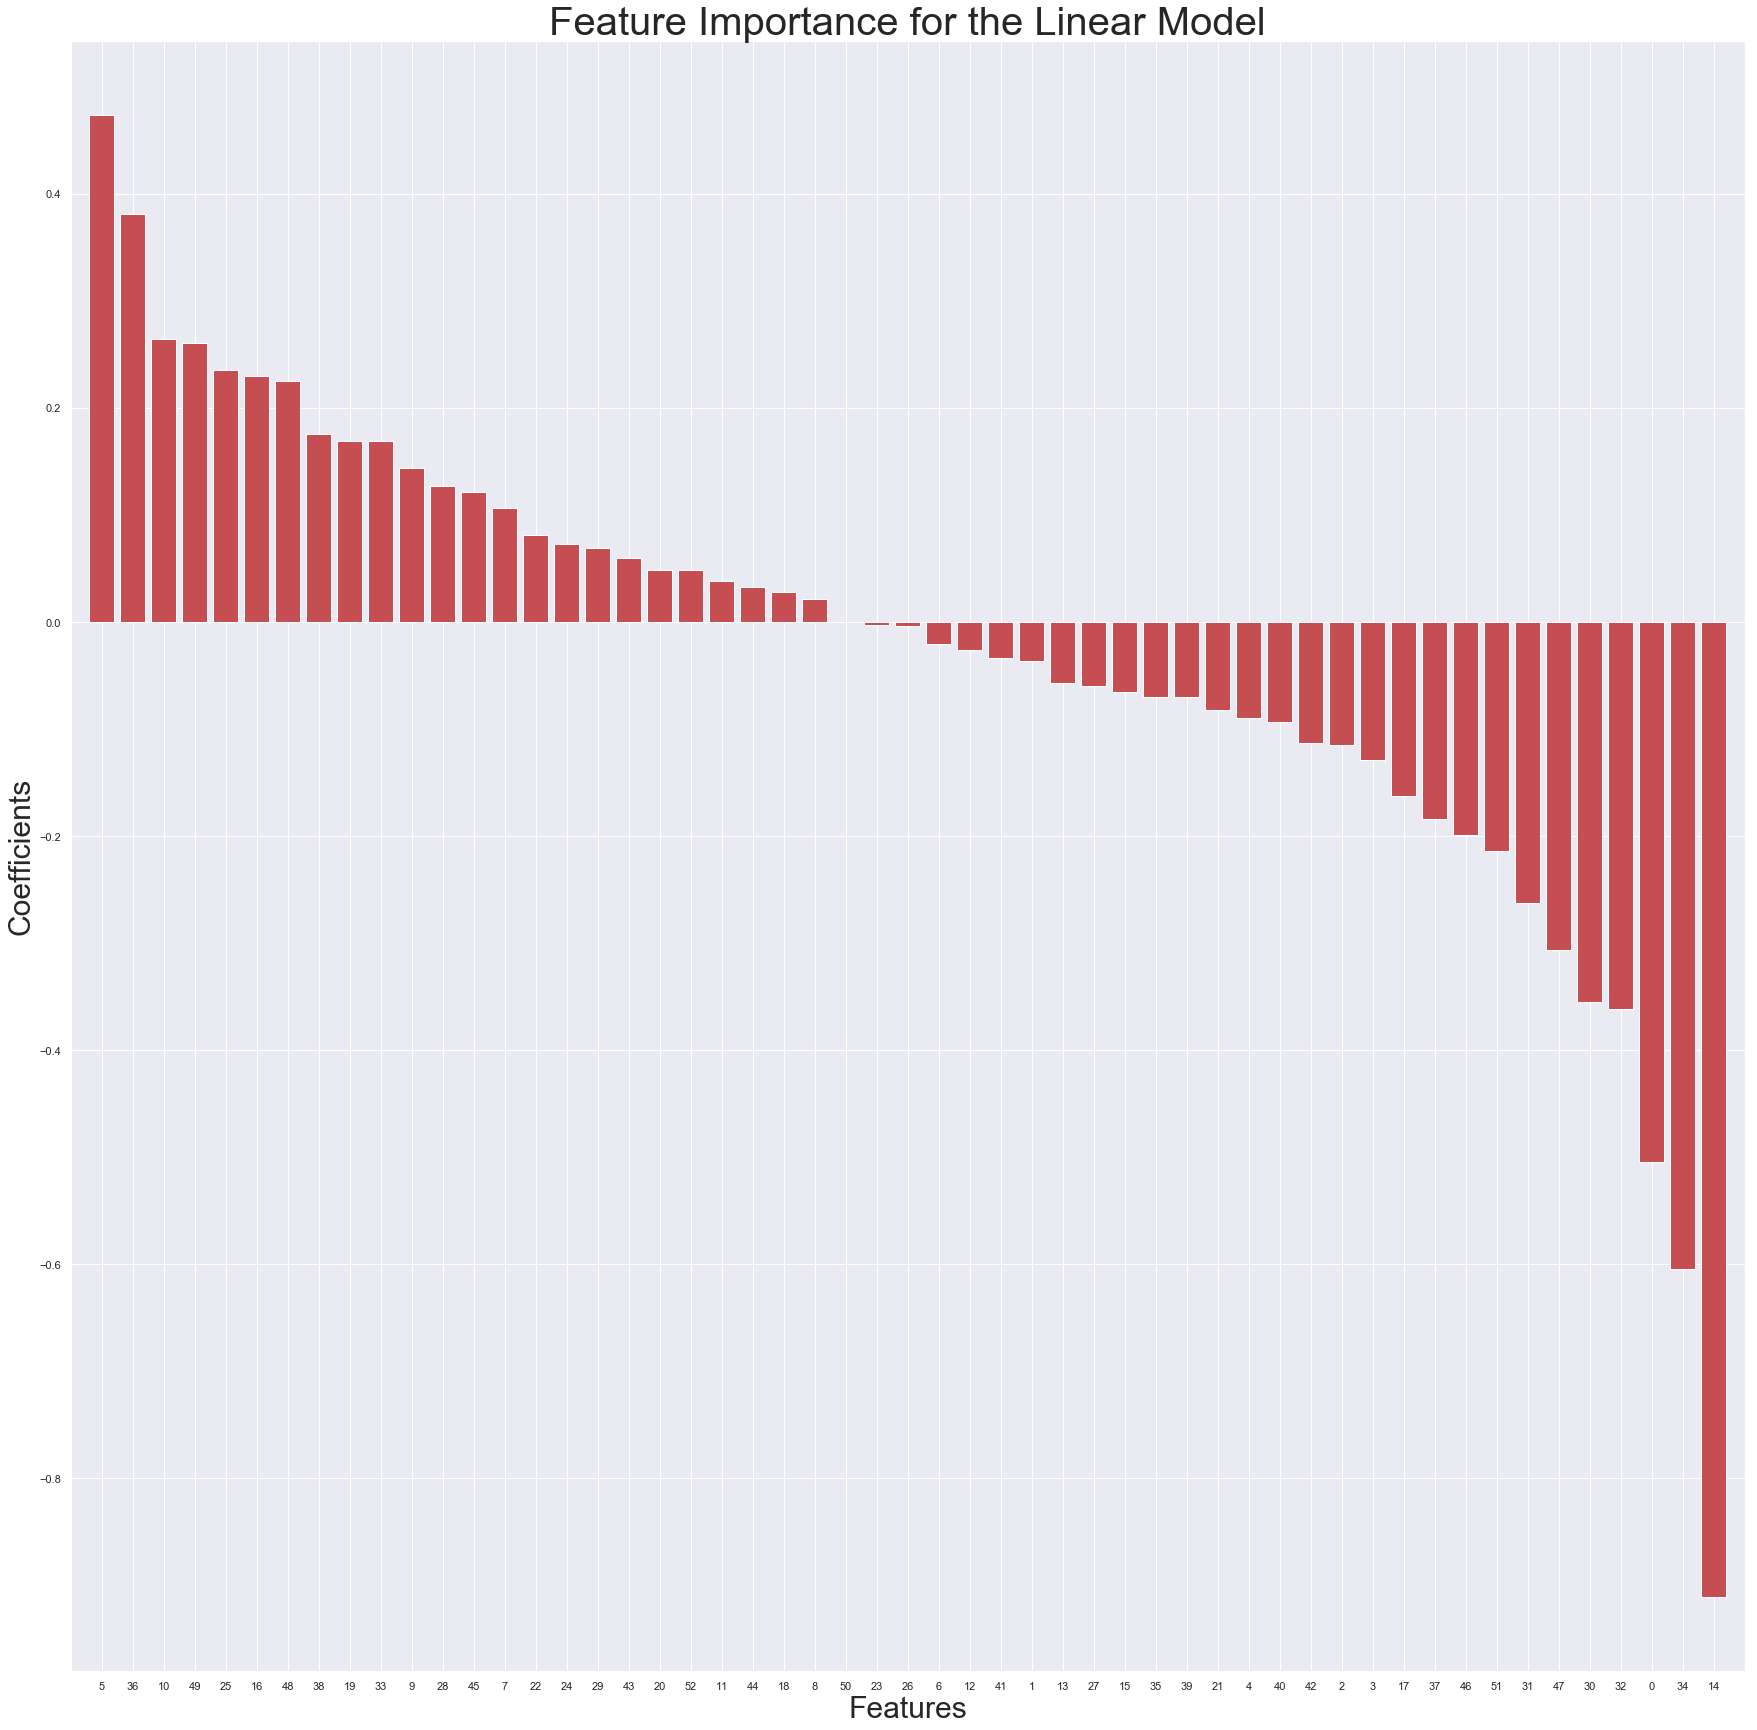

In [11]:
sns.set(rc={'figure.figsize':(30,30)})
importances = regr.coef_
#std = np.std([tree.feature_importances_ for tree in regr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
plt.figure()
plt.title("Feature Importance for the Linear Model").set_fontsize('40')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Coefficients', size=30)
plt.xlabel('Features', size=30)
plt.show()

 * Significant positive features: "Body", "Roasted", "Cereal", "sweet/creamy".
 * Significant negative features: "Nutty", "Acetaldehyde", "Phonolic", "DMS".	

### 2.1.2 Linear regression (after scaling)

In [12]:
df_scale0 = df.iloc[:,2:]
scaler = StandardScaler()
scaler.fit(df_scale0)
df_scale = pd.DataFrame(scaler.transform(df_scale0))
df_scale.columns = df_scale0.columns
df_scale

,score,Acetaldehyde,Acidity,Astringent,Biscuity,Bitterness,Body,Bready,Brett,Caramel,Carbonation,Cereal,Chocolate,Coffee,Colour/ Haze,DMS,Diacetyl,Dried Fruit,Earthy,Esters,Floral,Fruit -Berry,Fruit -Citrus,Fruit -Stone,Fruit- Melon,Fruit-Tropical,Grassy,Herbaceous,Intensity of Aroma,Intensity of Flavour,Length of Aftertaste,Metallic,Mineral,Nutty,Overall Liking,Oxidized,Phenolic,Phenols,Roasted,Skunky,Spicy,Sulphur,Sweetness,Vegetal,Woody,bitter,sour,sweet,carbonation,fruity,citrus,sweet/creamy,Cereal/grain,chocolate,savory
0,0.815552,0.959223,0.078162,0.401815,1.719372,0.317226,0.361771,1.019068,-0.343905,0.922595,0.067208,-0.418634,0.210269,0.466645,0.020398,-0.305574,0.749144,1.737316,0.000436,-0.808675,-0.713837,-0.636213,-0.448685,-0.028635,-0.466842,-0.817458,-0.922116,-0.761608,-0.611678,-1.171254,-0.805091,2.979001,-0.121093,1.359368,0.185499,2.933915,1.558143,0.481757,1.361050,-0.247849,-0.175378,-0.607688,1.051574,1.158651,0.241655,-1.493878,1.288899,1.415501,0.724811,1.953667,-0.548398,-0.229691,0.0,0.013302,0.068678
1,0.180752,0.959223,0.078162,0.401815,1.719372,0.317226,0.361771,1.019068,-0.343905,0.922595,0.067208,-0.418634,0.210269,0.466645,0.020398,-0.305574,0.749144,1.737316,0.000436,-0.808675,-0.713837,-0.636213,-0.448685,-0.028635,-0.466842,-0.817458,-0.922116,-0.761608,-0.611678,-1.171254,-0.805091,2.979001,-0.121093,1.359368,0.185499,2.933915,1.558143,0.481757,1.361050,-0.247849,-0.175378,-0.607688,1.051574,1.158651,0.241655,-1.493878,-1.278664,-1.503263,-2.038071,-1.470125,-0.548398,-0.229691,0.0,-1.048435,-1.629901
2,0.180752,0.959223,0.078162,0.401815,1.719372,0.317226,0.361771,1.019068,-0.343905,0.922595,0.067208,-0.418634,0.210269,0.466645,0.020398,-0.305574,0.749144,1.737316,0.000436,-0.808675,-0.713837,-0.636213,-0.448685,-0.028635,-0.466842,-0.817458,-0.922116,-0.761608,-0.611678,-1.171254,-0.805091,2.979001,-0.121093,1.359368,0.185499,2.933915,1.558143,0.481757,1.361050,-0.247849,-0.175378,-0.607688,1.051574,1.158651,0.241655,-0.552970,-0.636773,0.831748,-0.196150,0.812403,1.823492,-0.229691,0.0,-1.048435,-0.780611
3,-0.454048,0.959223,0.078162,0.401815,1.719372,0.317226,0.361771,1.019068,-0.343905,0.922595,0.067208,-0.418634,0.210269,0.466645,0.020398,-0.305574,0.749144,1.737316,0.000436,-0.808675,-0.713837,-0.636213,-0.448685,-0.028635,-0.466842,-0.817458,-0.922116,-0.761608,-0.611678,-1.171254,-0.805091,2.979001,-0.121093,1.359368,0.185499,2.933915,1.558143,0.481757,1.361050,-0.247849,-0.175378,-0.607688,1.051574,1.158651,0.241655,0.858390,-1.278664,-0.919510,-0.196150,-0.328861,-0.548398,4.353682,0.0,-1.048435,0.917968
4,0.180752,-0.316834,0.734874,-0.504178,0.084644,0.245974,1.281858,0.014117,0.681387,-0.076779,2.550554,-0.418634,-0.348327,-0.349700,0.448716,2.027419,1.162822,-0.312027,-1.148607,1.736601,0.293798,-0.805613,0.322246,-0.391247,0.218359,-0.639824,0.133448,-0.761608,0.016559,0.113234,-0.290405,-0.021510,0.140135,1.230352,0.185499,0.589186,0.833157,1.414578,-0.572871,0.760777,0.712980,1.109287,1.233681,-0.651752,-0.486072,-1.493878,1.288899,1.415501,0.724811,1.953667,-0.548398,-0.229691,0.0,0.013302,0.068678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,0.815552,-0.316834,0.078162,-0.504178,1.090631,-0.609051,1.281858,0.907407,-0.343905,-0.076779,-2.179628,0.428768,2.630849,1.827220,2.269067,-0.305574,-0.491891,0.433189,2.426195,-1.040063,-2.009367,-0.466814,-1.079447,-0.874731,-0.877962,-0.284557,0.133448,0.817047,0.016559,0.455764,0.533093,0.684493,-0.904777,0.714289,0.495282,-0.583178,-0.616817,-0.243771,2.328011,-0.247849,-0.471498,1.109287,-0.223174,-0.651752,0.807664,0.387937,0.005118,0.831748,0.724811,-0.328861,-0.548398,-0.229691,0.0,1.075039,0.917968
874,0.815552,-0.316834,0.078162,-1.228972,0.587637,-0.039034,0.464002,1.354051,-0.343905,1.376857,1.131500,0.852469,1.141261,0.738760,0.341636,-

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_scale0.iloc[:,1:].drop(columns='Overall Liking'),
                                                    df_scale0['score'],
                                                    stratify = df_scale0['score'],
                                                    test_size = 0.2,
                                                    random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 53)
(176, 53)
(702,)
(176,)


In [14]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# cv
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=5)
print(scores)

# Make cross validated predictions
y_pred = cross_val_predict(regr, X_train, y_train, cv=5)

print(r2_score(y_train, y_pred))
print("%0.4f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('R Square: %.2f' % r2_score(y_test, y_pred))

[0.28316924 0.00766624 0.08240899 0.02356519 0.26349036]
0.1360810288355424
0.1321 accuracy with a standard deviation of 0.12
Coefficients: 
 [-0.30999072  0.04732652 -0.16725579 -0.09929582 -0.09887448  0.56262813
 -0.06883307  0.04149475  0.14750838  0.13707157  0.24779305  0.1696491
 -0.04934191 -0.06275046 -0.75548504 -0.17913162  0.13078807 -0.1196509
 -0.04775772  0.09067462  0.05893554 -0.05897477  0.18353616  0.1994046
 -0.09969842  0.0532619  -0.08273027 -0.04513418  0.07714333  0.09359305
 -0.2886659  -0.40340369 -0.25215702  0.19864784 -0.14419844 -0.06969515
  0.16333148 -0.44650336  0.15205777  0.39579509 -0.20840098 -0.21631914
 -0.06337887  0.09907011  0.04692757  0.12514609 -0.21121668 -0.38367272
  0.25331655  0.15838231  0.         -0.13285979  0.0096603 ]
Root mean squared error: 1.39
R Square: 0.22


* Compare the R Square value with the previous case, there is no need to scale the data, since the range of all columns are from 0 to 10.

### 2.2 Lasso

In [15]:
# hyperparameter tunining (alpha)

a_list = [0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01]
r2_list = []

# define search space
space = dict()
space['alpha'] = [0.75, 0.5, 0.25, 0.1, 0.075, 0.05, 0.025, 0.01]
regr = linear_model.Lasso()

# define grid search
search = GridSearchCV(regr, space, scoring='r2', n_jobs=-1, cv=5)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.1850543247466743
Best Hyperparameters: {'alpha': 0.025}


In [16]:
regr = linear_model.Lasso(alpha=0.025)
regr.fit(X_train, y_train)

# Make predictions using the new testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Root Mean squared error: %.2f'
      % np.sqrt(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('R square: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [-0.          0.         -0.13494781 -0.         -0.10826557  0.50817293
 -0.         -0.          0.01875506  0.07103261  0.19520977  0.11544245
  0.         -0.0256989  -0.         -0.          0.         -0.
  0.          0.          0.06515282 -0.01029379  0.13342958  0.
 -0.         -0.         -0.          0.          0.          0.11123528
 -0.22887608 -0.         -0.09438005  0.         -0.16205878  0.
  0.08143109 -0.11872635  0.06463031  0.         -0.         -0.12705845
 -0.0395361   0.06479869 -0.03041465 -0.         -0.         -0.28585833
  0.18486082 -0.          0.         -0.         -0.        ]
Root Mean squared error: 1.39
R square: 0.22


* When Alpha = 0.025, R square achieves the highest, 0.22.

In [17]:
#Identifying the removed features
removed_feats = X_train.columns[(regr.coef_ == 0).ravel().tolist()]
print('removed_features: %s' % removed_feats)

remained_feats = X_train.columns[(regr.coef_ != 0).ravel().tolist()]
print('remained_features: %s' % remained_feats)

removed_features: Index(['Acetaldehyde', 'Acidity', 'Biscuity', 'Bready', 'Brett', 'Coffee',
       'DMS', 'Diacetyl', 'Dried Fruit', 'Earthy', 'Esters', 'Floral',
       'Fruit- Melon', 'Fruit-Tropical', 'Grassy', 'Herbaceous',
       'Intensity of Aroma', 'Intensity of Flavour', 'Mineral', 'Oxidized',
       'Phenols', 'Sulphur', 'Sweetness', 'sweet', 'carbonation',
       'sweet/creamy', 'Cereal/grain', 'chocolate', 'savory'],
      dtype='object')
remained_features: Index(['Astringent', 'Bitterness', 'Body', 'Caramel', 'Carbonation', 'Cereal',
       'Chocolate', 'Colour/ Haze', 'Fruit -Berry', 'Fruit -Citrus',
       'Fruit -Stone', 'Length of Aftertaste', 'Metallic', 'Nutty', 'Phenolic',
       'Roasted', 'Skunky', 'Spicy', 'Vegetal', 'Woody', 'bitter', 'sour',
       'fruity', 'citrus'],
      dtype='object')


### 2.3 Decision Tree

In [18]:
regr = ExtraTreesRegressor(n_estimators=100, random_state=0)
regr = regr.fit(X_train, y_train)
print(regr.feature_importances_)  
y_pred = regr.predict(X_test)

# RMSE and R Square
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square: %.2f' % metrics.r2_score(y_test, y_pred))

[0.01791557 0.01558692 0.02172475 0.01983099 0.01761509 0.05011112
 0.01648451 0.00861662 0.021435   0.02641878 0.02077544 0.02233432
 0.0078037  0.01638923 0.00520763 0.00997258 0.01256355 0.01237606
 0.01389977 0.01522686 0.02133662 0.01392138 0.0194481  0.01414291
 0.01502021 0.02488394 0.01495072 0.01929682 0.02411006 0.01663608
 0.0155846  0.02447639 0.01411993 0.00957646 0.01546759 0.02084502
 0.01451679 0.00939912 0.01803289 0.01197059 0.01703989 0.0317886
 0.01428487 0.04090831 0.03226809 0.05710749 0.01204405 0.05017358
 0.0113693  0.01184077 0.         0.01575764 0.01539273]
Root Mean Squared Error (RMSE): 1.5511056815147293
R square: 0.03


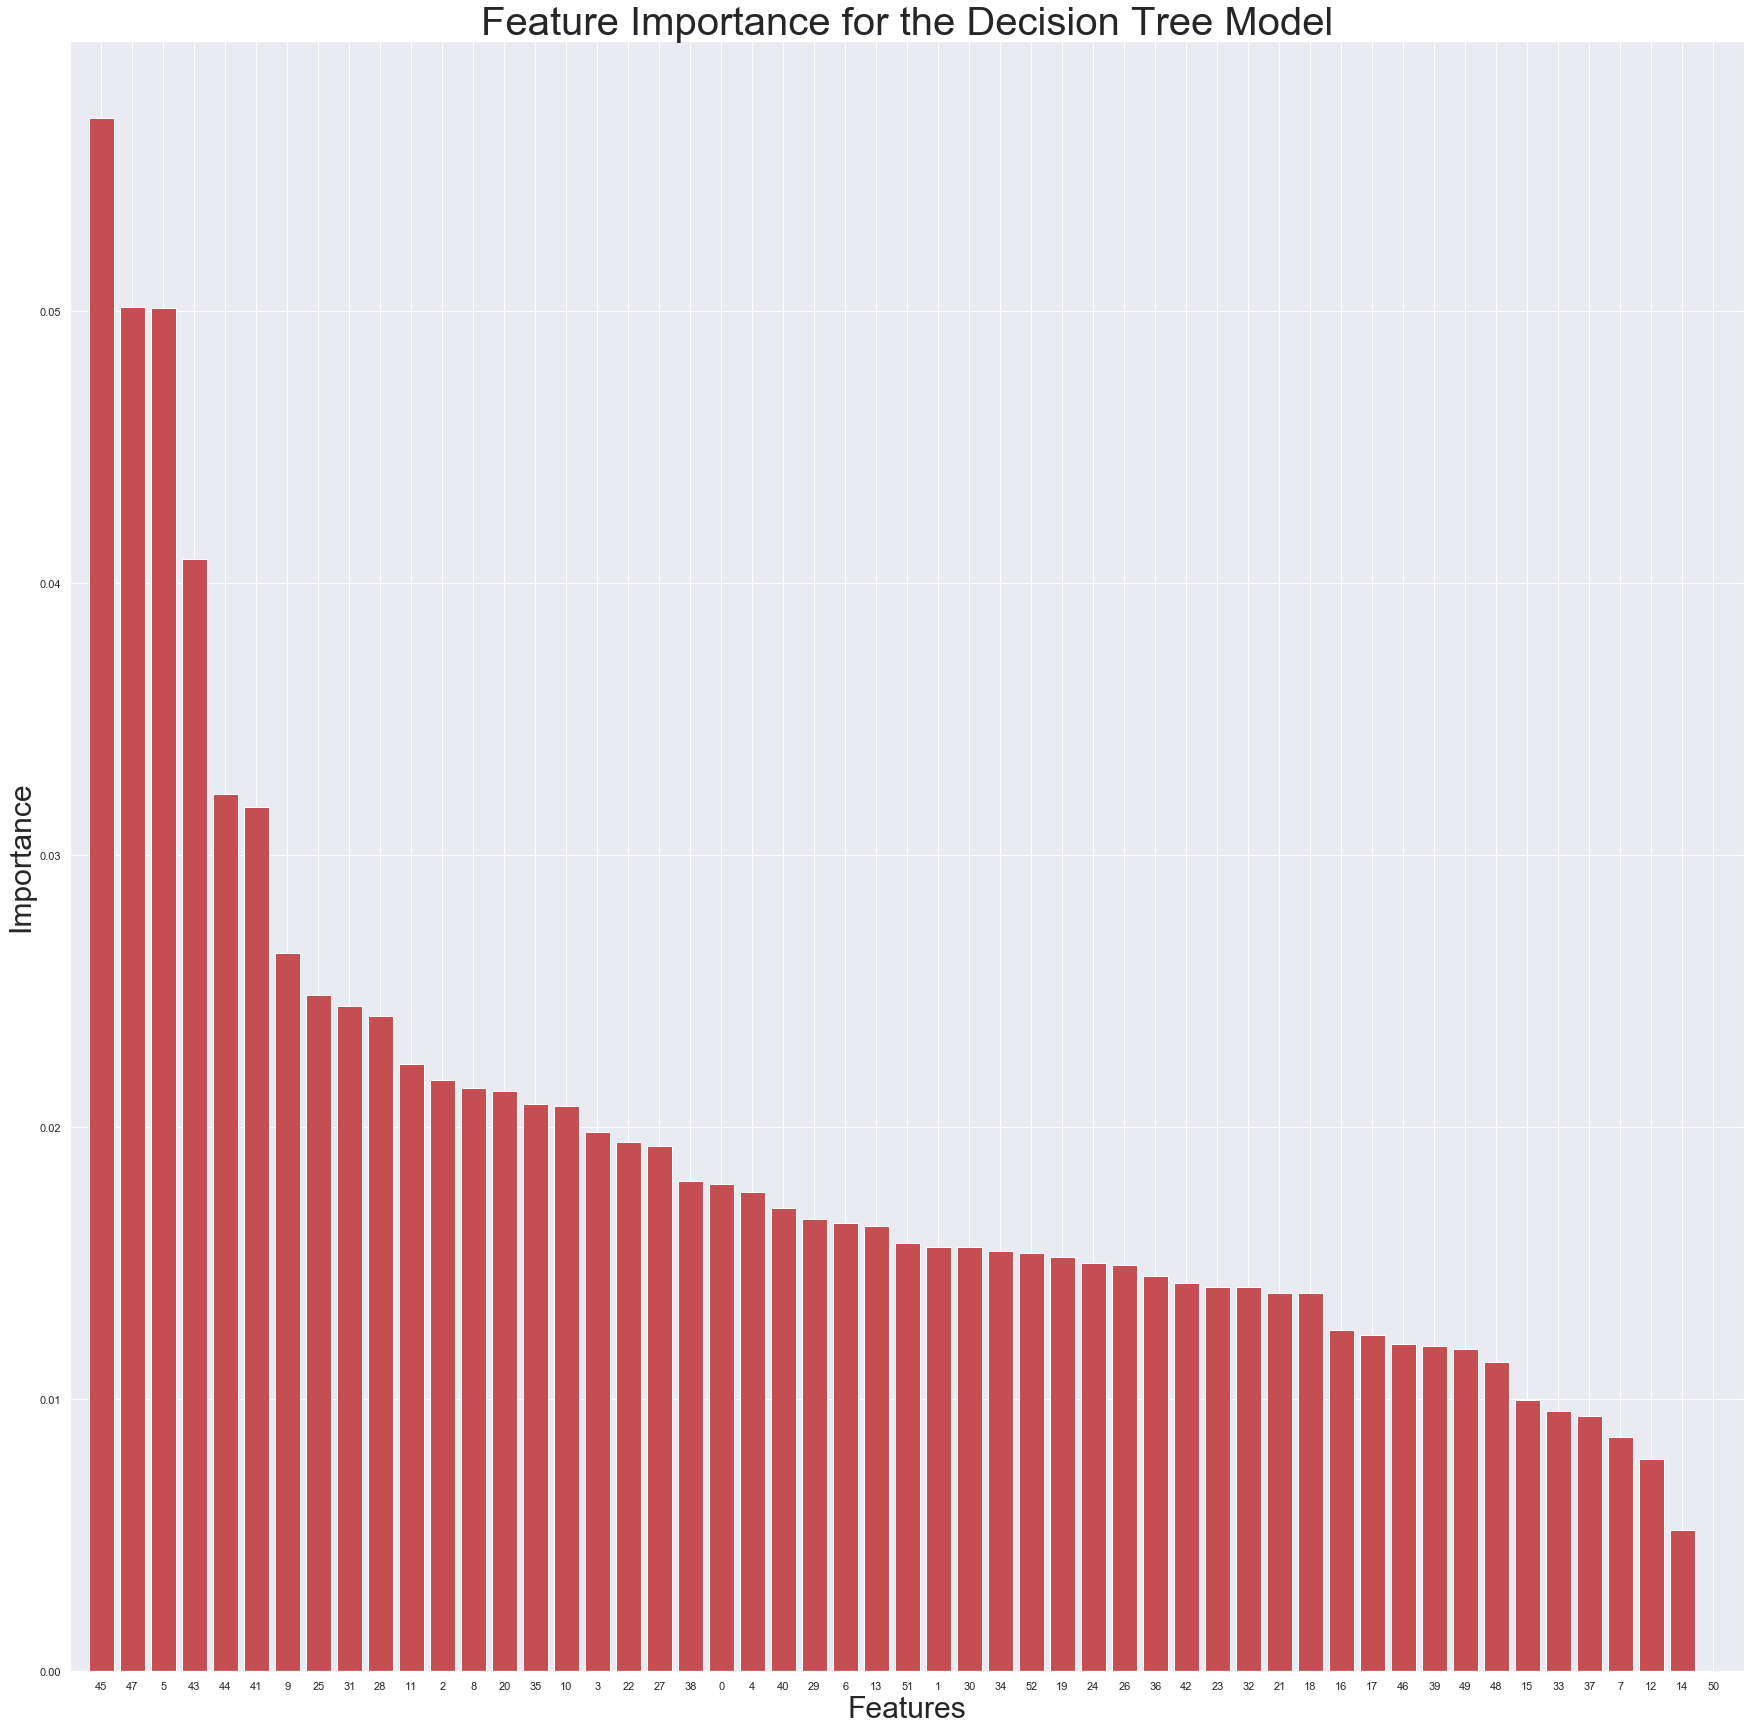

In [19]:
sns.set(rc={'figure.figsize':(30,30)})
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
plt.figure()
plt.title("Feature Importance for the Decision Tree Model").set_fontsize('40')
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r",  align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', size=30)
plt.xlabel('Features', size=30)
plt.show()

* Significant features: "sweet", "fruity", "Body", "bitter", "sour", "Vegetal", "Carbonation", "Grassy".

### 2.4 Random Forest

In [20]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# RMSE and R Square
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square: %.2f' % metrics.r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.4648323449552987
R Square: 0.13


In [21]:
# Hyperparameter tuning - Grid search
regr = RandomForestRegressor(random_state=0)

rf_param_grid = {'max_depth': np.arange(2, 7, 1),
                 'min_samples_split': np.arange(2, 5, 1),
                  'n_estimators': np.arange(20, 200, 20)}

random_rf = RandomizedSearchCV(estimator=regr, 
                                    param_distributions=rf_param_grid,
                                    n_iter=50, 
                                    scoring='r2', 
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1
                                    )

random_rf.fit(X_train, y_train)
print("Best parameters found: ",random_rf.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s


Best parameters found:  {'n_estimators': 20, 'min_samples_split': 2, 'max_depth': 4}


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   22.3s finished


In [22]:
regr = RandomForestRegressor(n_estimators= 100, max_depth=4, min_samples_split= 4, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# RMSE and R Square
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Square: %.2f' % metrics.r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.4204706968119707
R Square: 0.18


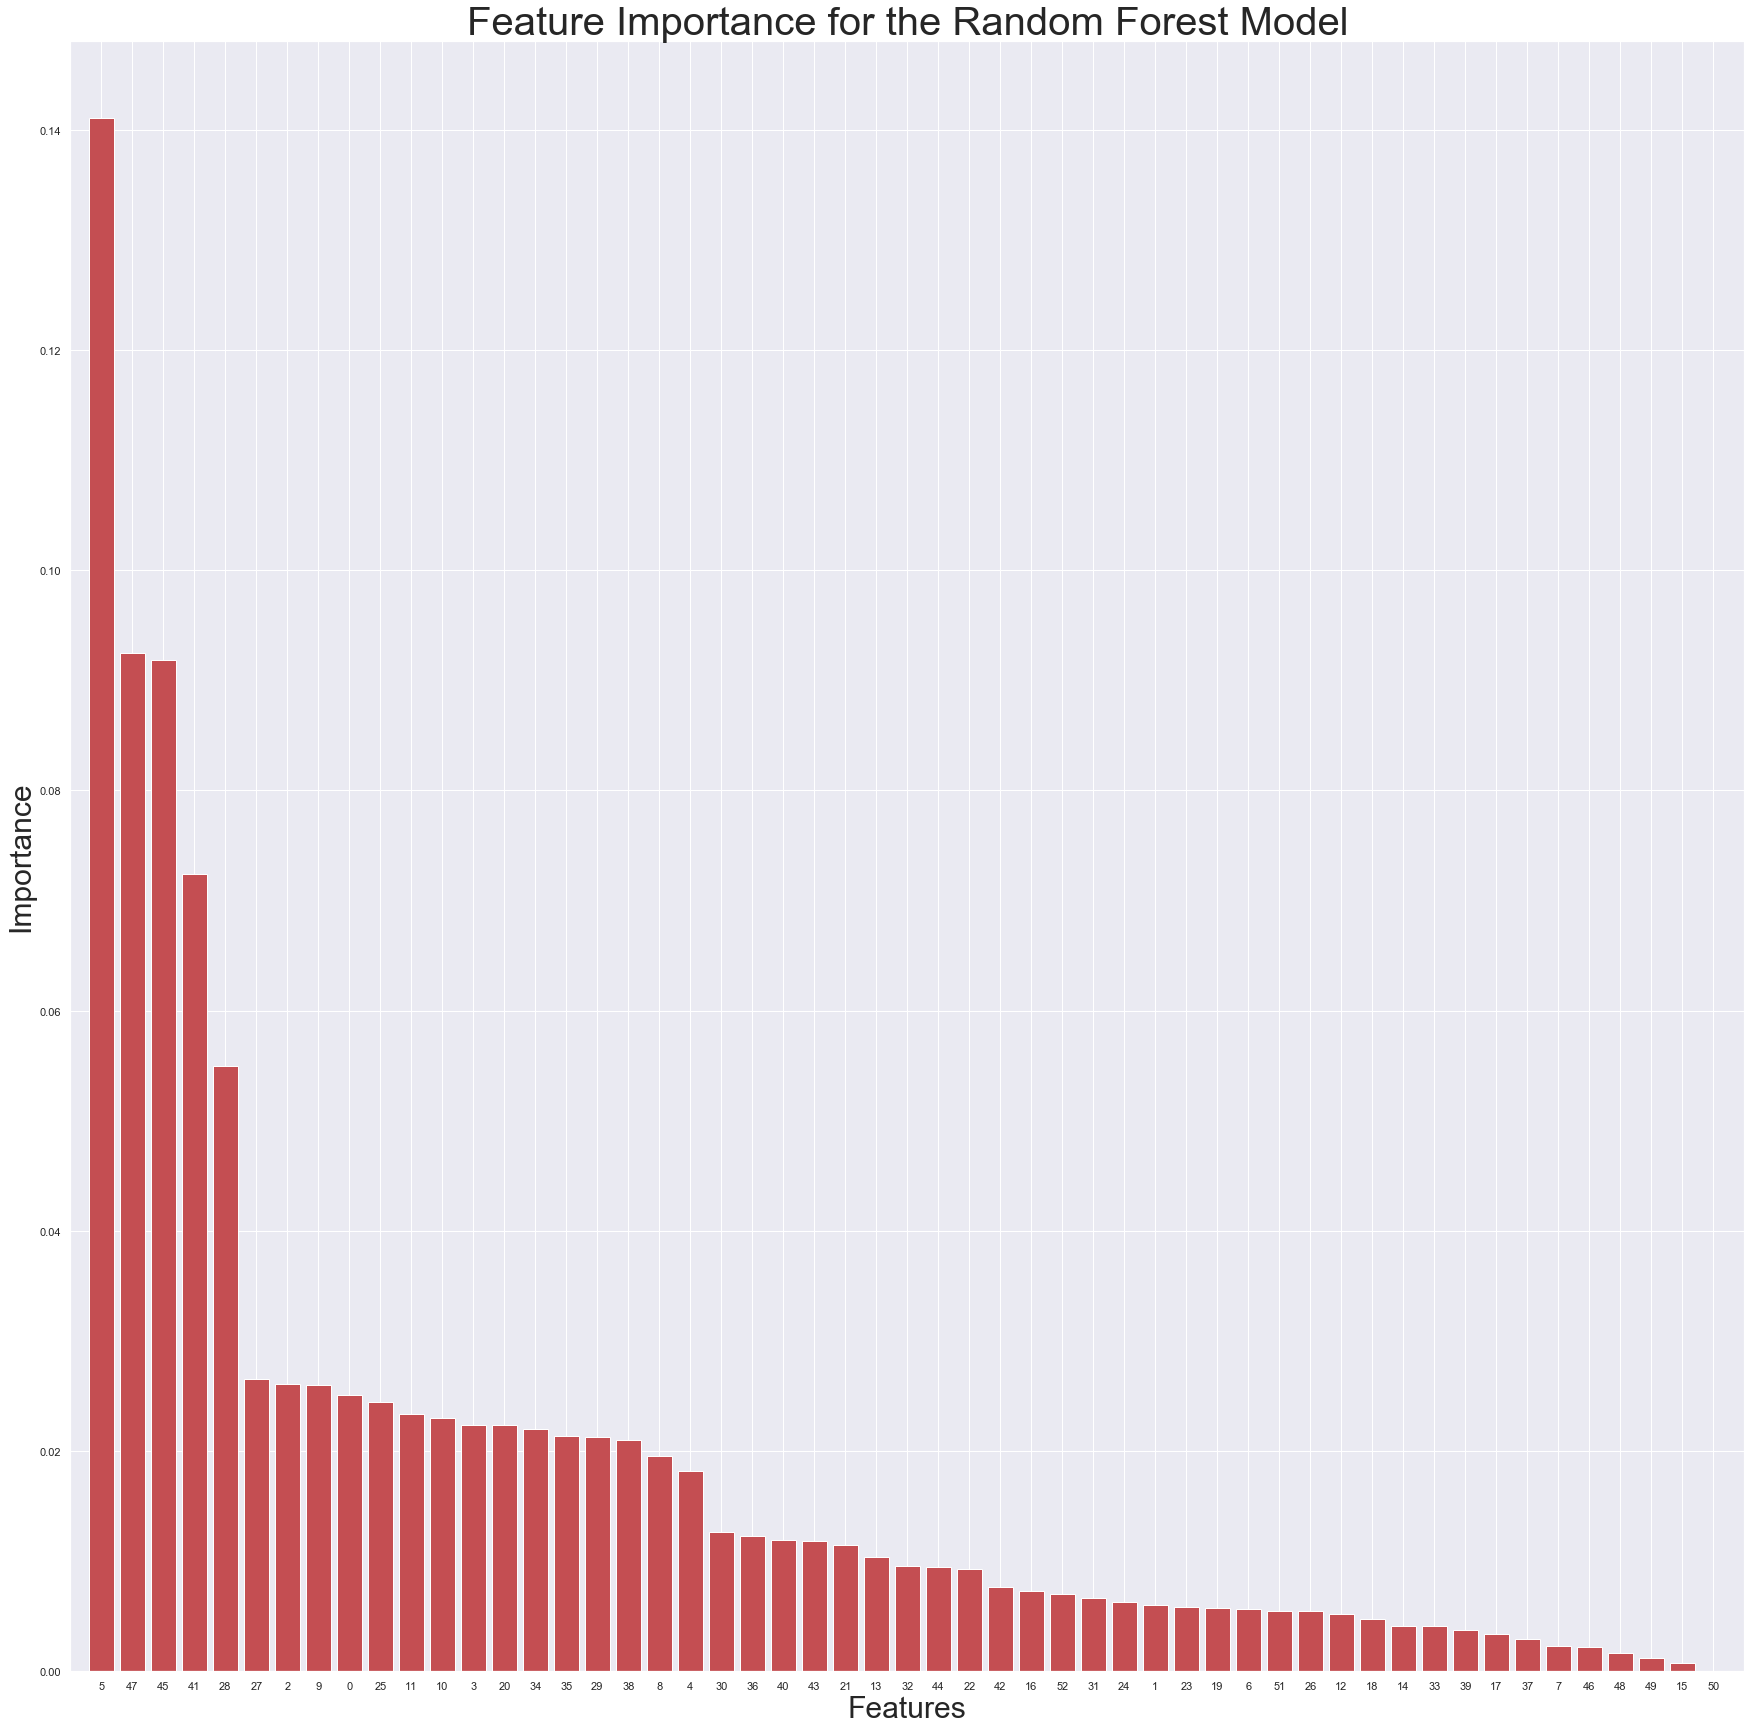

In [23]:
sns.set(rc={'figure.figsize':(30,30)})
importances = regr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in regr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
plt.figure()
plt.title("Feature Importance for the Random Forest Model").set_fontsize('40')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', size=30)
plt.xlabel('Features', size=30)
plt.show()

* Significant features: "Body", "Phenolic", "fruity", "sweet", "Intensity of Flavour", "Vegetal", "Intensity of Aroma", "Acetaldehyde".

### 2.5 XGBoost

In [24]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'learning_rate': 0.01}

reg = ensemble.GradientBoostingRegressor(**params, random_state=0)
reg.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
r2 = r2_score(y_test, reg.predict(X_test))
print("Root mean squared error (RMSE): {:.4f}".format(rmse))
print("R Square: {:.4f}".format(r2))

Root mean squared error (RMSE): 1.4659
R Square: 0.1298


In [25]:
# Hyperparameter tuning - Grid search
regr = GradientBoostingRegressor(random_state=0)

xgb_param_grid = {'max_depth': np.arange(5, 9, 1),
                 'learning_rate': np.arange(0.05,0.25, 0.05),
                  'n_estimators': np.arange(100, 400, 100)}

random_xgb = RandomizedSearchCV(estimator=regr, 
                                    param_distributions=xgb_param_grid,
                                    n_iter=100, 
                                    scoring='r2', 
                                    cv=2,
                                    verbose=1,
                                    n_jobs=-1
                                    )

random_xgb.fit(X_train, y_train)
print("Best parameters found: ", random_xgb.best_params_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   30.0s finished


Best parameters found:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.05}


In [26]:
params = {'n_estimators': 100,
          'max_depth': 5,
          'learning_rate': 0.05}

reg = ensemble.GradientBoostingRegressor(**params, random_state=0)
reg.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
r2 = r2_score(y_test, reg.predict(X_test))

print("Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("R square: {:.4f}".format(r2))

Root mean squared error (RMSE) on test set: 1.4569
R square: 0.1405


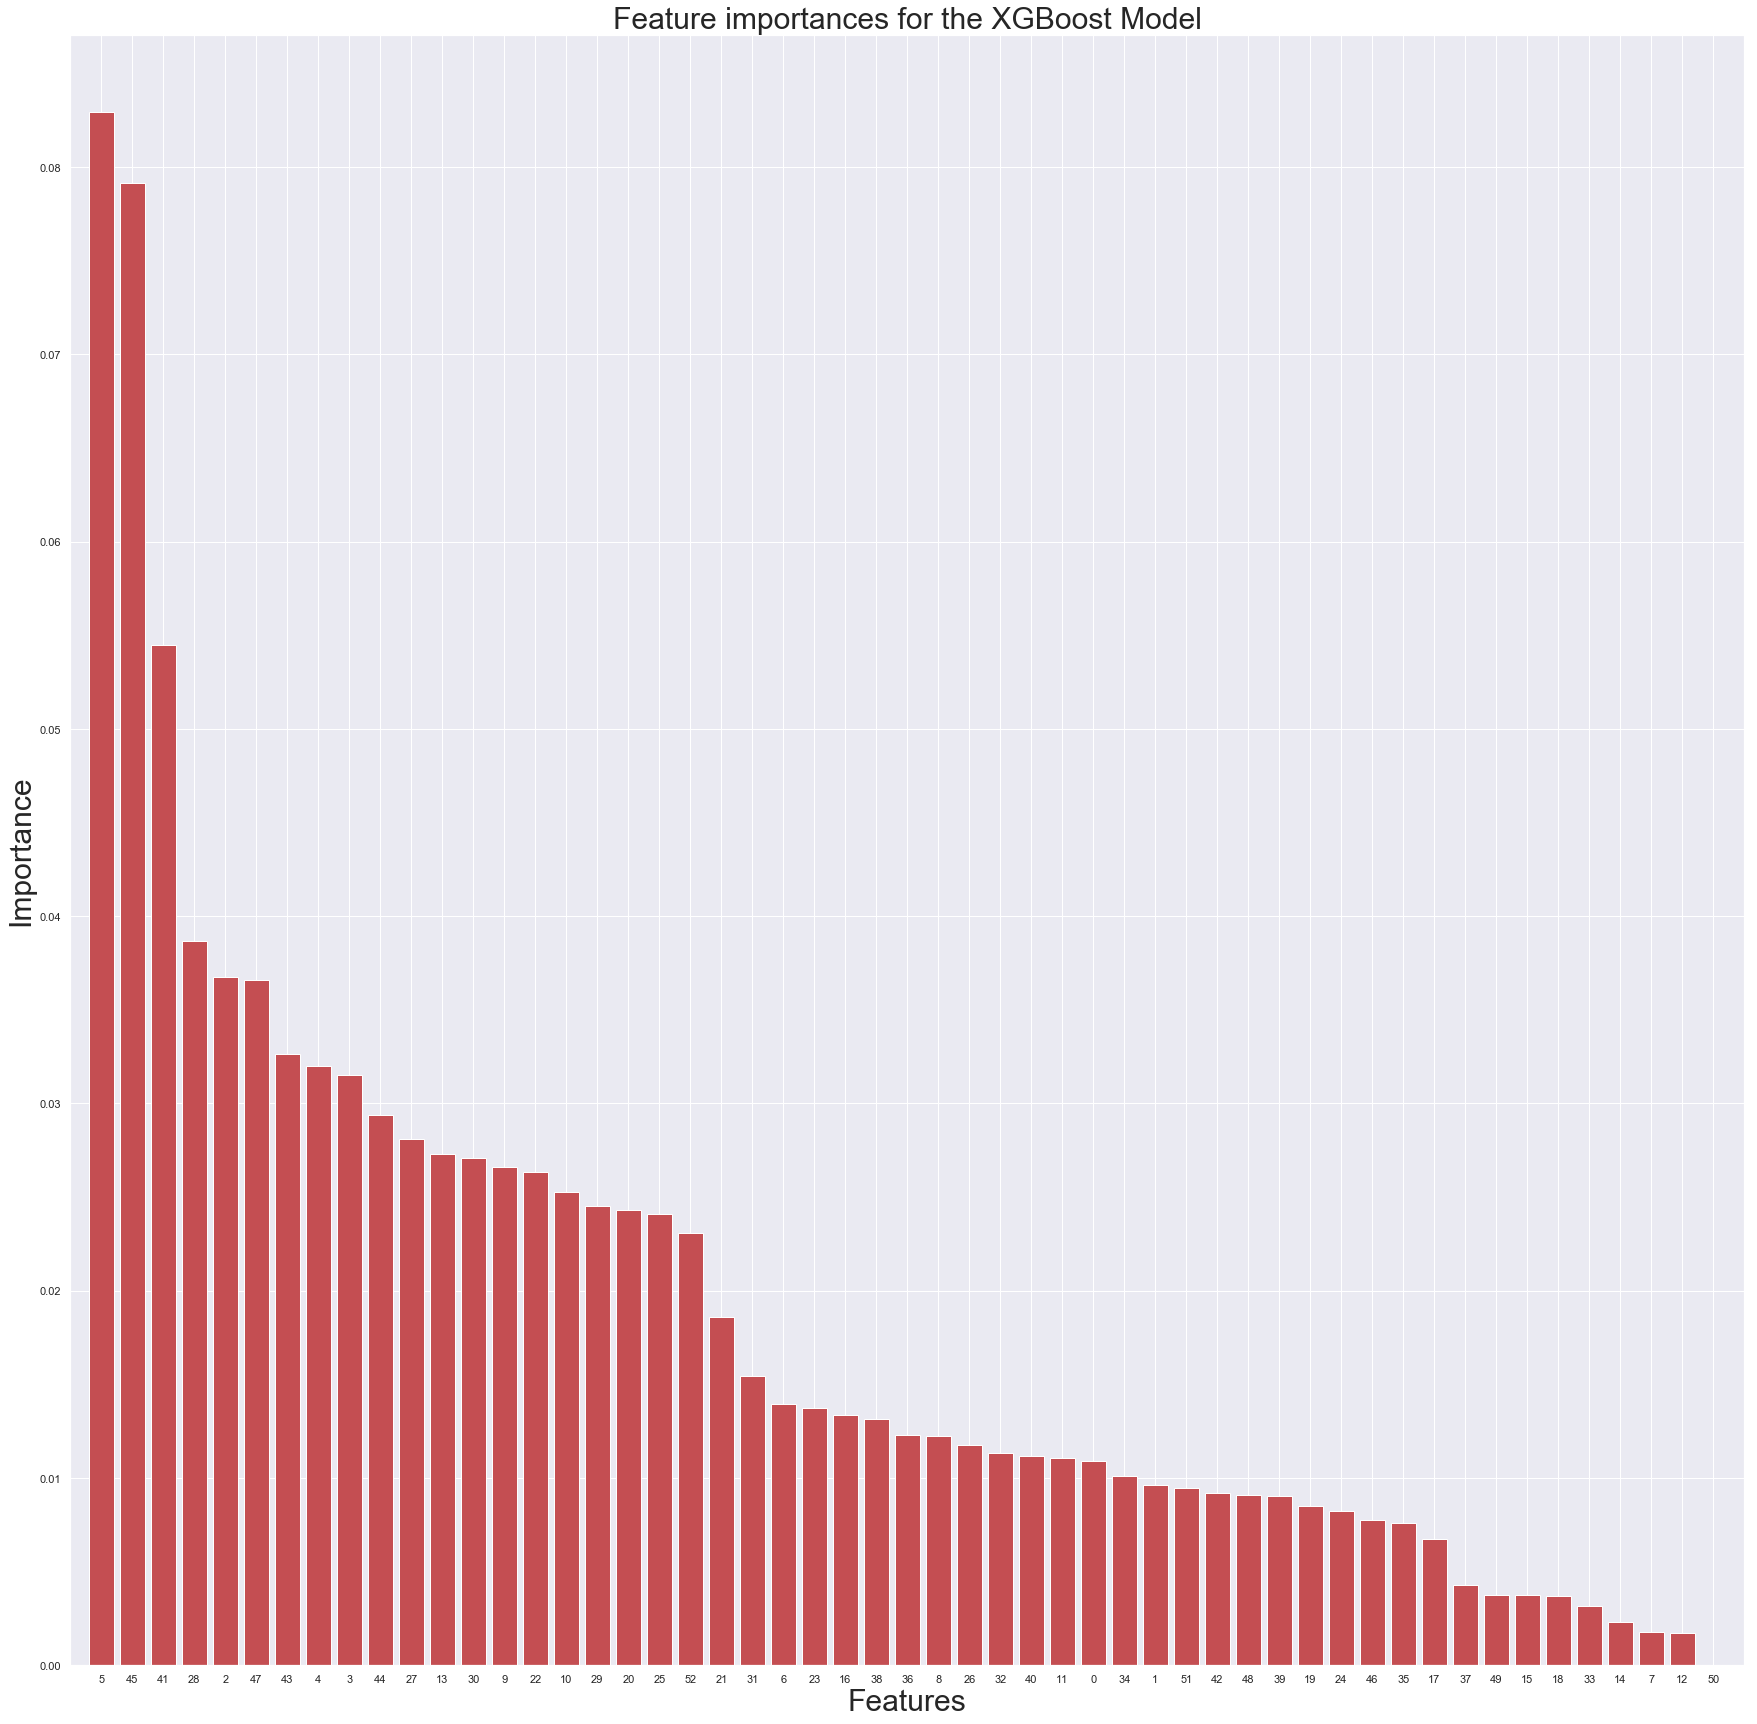

In [27]:
sns.set(rc={'figure.figsize':(30,30)})
importances = reg.feature_importances_
#std = np.std([tree.feature_importances_ for tree in regr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
plt.figure()
plt.title("Feature importances for the XGBoost Model", size = 30)
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', size=30)
plt.xlabel('Features', size=30)
plt.show()

* Significant features: "Body", "sweet", "Intensity of Aroma", "Metallic", "Vegetal", "Phenolic", "Brett", "sour".

### 2.6 Stacking Lasso and XGBoost

In [28]:
params = {'n_estimators': 100,
          'max_depth': 5,
          'learning_rate': 0.05}

estimators = [
    ('lasso', Lasso()),
    ('xgb',  ensemble.GradientBoostingRegressor(**params, random_state=0))]

reg = StackingRegressor(estimators=estimators)

reg.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
r2 = r2_score(y_test, reg.predict(X_test))

print("Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("R square: {:.4f}".format(r2))


Root mean squared error (RMSE) on test set: 1.4300
R square: 0.1720


* Model stacking method does not outperform the single model.

### 2.7 SVR

In [29]:
svr = SVR(kernel='linear', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, svr.predict(X_test)))
r2 = r2_score(y_test, svr.predict(X_test))

print("Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("R square: {:.4f}".format(r2))

Root mean squared error (RMSE) on test set: 1.4458
R square: 0.1536


Text(0.5, 0, 'Features')

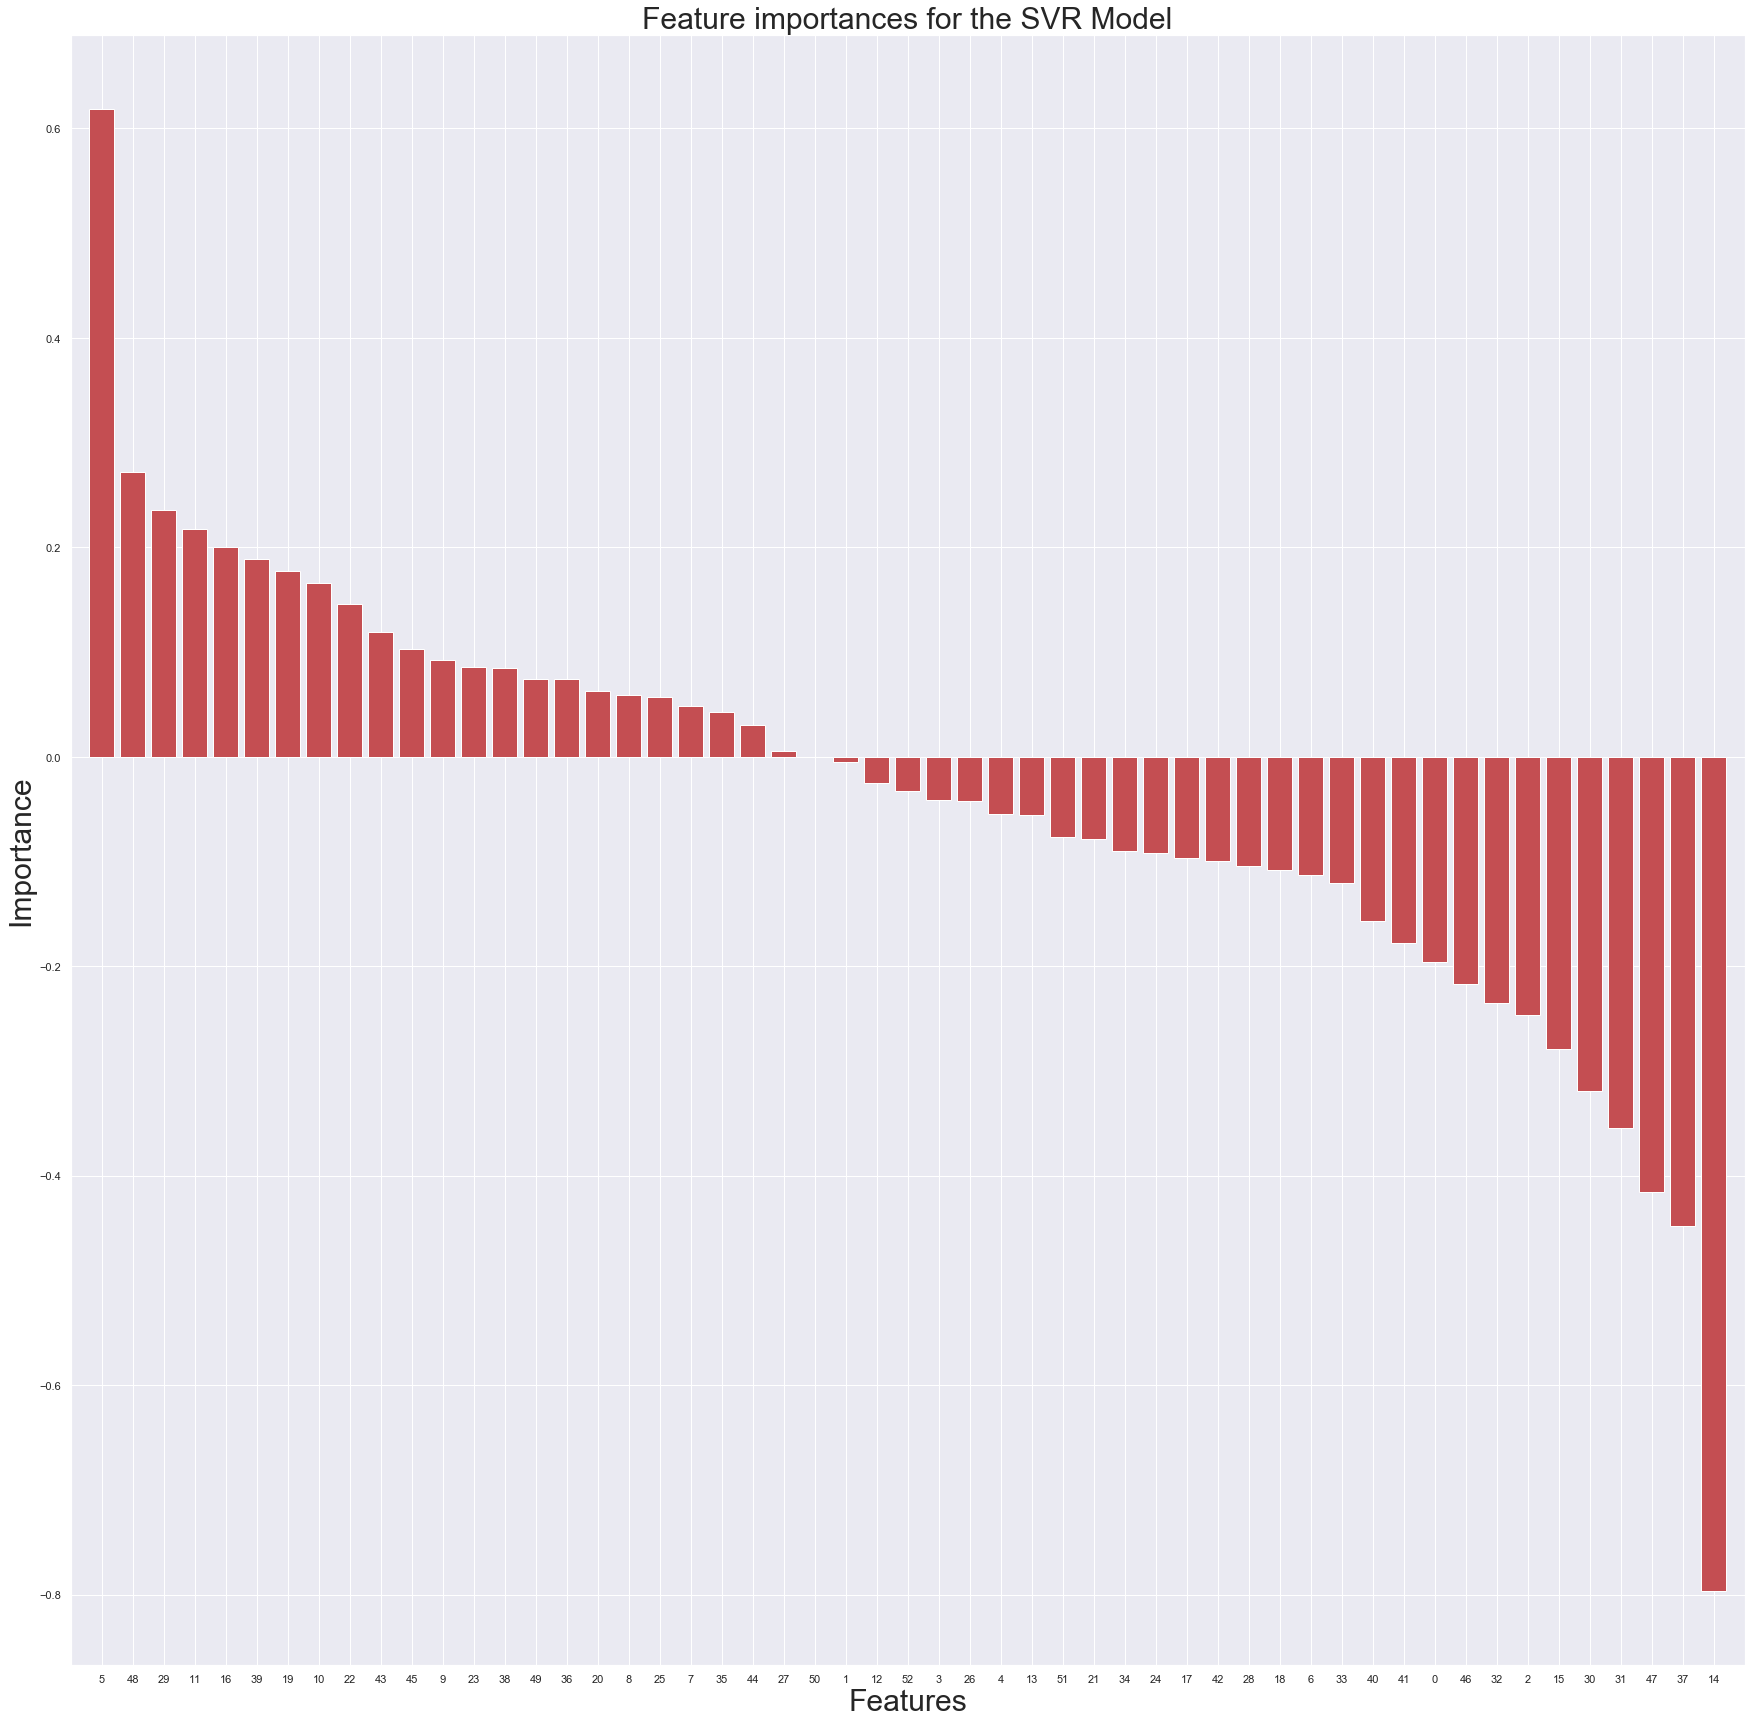

In [30]:
sns.set(rc={'figure.figsize':(30,30)})
importances = svr.coef_[0]

indices = np.argsort(importances)[::-1]

# Print the feature ranking
plt.figure()
plt.title("Feature importances for the SVR Model", size = 30)
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.ylabel('Importance', size=30)
plt.xlabel('Features', size=30)

* Significant positive features: "Body", "Roasted", "Brett", "citrus".
* Significant negative features: "Nutty", "Metallic", "Phenolic", "DMS".

In [31]:
# hyperparamer tuning
random_svr = GridSearchCV(estimator=SVR(),scoring='r2', cv=2,
             param_grid={'C': [1, 10, 100], 'kernel': ('linear', 'rbf')})

random_svr.fit(X_train, y_train)
print("Best parameters found: ", random_svr.best_params_)

Best parameters found:  {'C': 1, 'kernel': 'rbf'}


In [32]:
regr = make_pipeline(StandardScaler(), SVR(C=1, kernel='rbf'))
regr.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, regr.predict(X_test)))
r2 = r2_score(y_test, regr.predict(X_test))

print("Root mean squared error (RMSE) on test set: {:.4f}".format(rmse))
print("R square: {:.4f}".format(r2))

Root mean squared error (RMSE) on test set: 1.4023
R square: 0.2038


## 2.8 k-NN

In [33]:
regr = KNeighborsRegressor(n_neighbors=5)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# RMSE and R Square
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square: %.2f' % metrics.r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.50981636451108
R square: 0.08


In [34]:
# Hyperparameter tuning - Grid search
regr = KNeighborsRegressor(n_neighbors=5)

knn_param_grid = {'n_neighbors': np.arange(2, 7, 1),
                 'weights':['uniform', 'distance'] }

knn = RandomizedSearchCV(estimator=regr, 
                                    param_distributions=knn_param_grid,
                                    n_iter=50, 
                                    scoring='r2', 
                                    cv=3,
                                    verbose=1,
                                    n_jobs=-1
                                    )

knn.fit(X_train, y_train)
print("Best parameters found: ", knn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters found:  {'weights': 'uniform', 'n_neighbors': 6}


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [35]:
regr = KNeighborsRegressor(n_neighbors=5, weights= 'uniform')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# RMSE and R Square
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R square: %.2f' % metrics.r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 1.50981636451108
R square: 0.08


## 2.9 ANN

In [36]:
# define r2 as metric
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Initialize ANN model
model = Sequential()
model.add(Dense(5, input_shape=(53, ), activation='relu', name='dense_1'))
model.add(Dense(1, activation='linear', name='dense_output'))
model.compile(optimizer='adam', loss='mse', metrics=[coeff_determination])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 270       
_________________________________________________________________
dense_output (Dense)         (None, 1)                 6         
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Instructions for updating:
Use tf.cast instead.
Train on 666 samples, validate on 36 samples
Epoch 1/100
666/666 [==============================] - 1s 1ms/step - loss: 19.8705 - coeff_determination: -8.7215 - val_loss: 5.3268 - val_coeff_determination: -1.8815
Epoch 2/100
666/666 [==============================] - 0s 37us/step - loss: 7.0483 - coeff_determination: -2.0329 - val_loss: 4.2527 - val_coeff_determination: -1.3155
Epoch 3/100
666/666 [==============================] - 0s 33us/step - loss: 5.9336 - coeff_determination: -1.4741 - val_loss: 3.4586 - val_coeff_determination: -0.8836
Epoch 4/100
666/666 [==============================] - 0s 45us/step - loss: 5.2666 - coeff_determination: -1.2615 - val_loss: 3.0454 - val_coeff_determination: -0.6579
Epoch 5/100
666/666 [==============================] - 0s 39us/step - loss: 4.8006 - coeff_determination: -1.0725 - val_loss: 2.8625 - val_coeff_determination: -0.5583
Epoch 6/100
666/666 [==============================] - 0s 48us/step

666/666 [==============================] - 0s 46us/step - loss: 1.9884 - coeff_determination: 0.1758 - val_loss: 1.5346 - val_coeff_determination: 0.1648
Epoch 49/100
666/666 [==============================] - 0s 50us/step - loss: 1.9816 - coeff_determination: 0.1841 - val_loss: 1.5364 - val_coeff_determination: 0.1637
Epoch 50/100
666/666 [==============================] - 0s 49us/step - loss: 1.9787 - coeff_determination: 0.1780 - val_loss: 1.5471 - val_coeff_determination: 0.1579
Epoch 51/100
666/666 [==============================] - 0s 52us/step - loss: 1.9709 - coeff_determination: 0.1804 - val_loss: 1.5544 - val_coeff_determination: 0.1540
Epoch 52/100
666/666 [==============================] - 0s 57us/step - loss: 1.9662 - coeff_determination: 0.1632 - val_loss: 1.5677 - val_coeff_determination: 0.1468
Epoch 53/100
666/666 [==============================] - 0s 61us/step - loss: 1.9669 - coeff_determination: 0.1580 - val_loss: 1.5595 - val_coeff_determination: 0.1514
Epoch 54/10

Epoch 97/100
666/666 [==============================] - 0s 90us/step - loss: 1.8328 - coeff_determination: 0.2399 - val_loss: 1.5581 - val_coeff_determination: 0.1529
Epoch 98/100
666/666 [==============================] - 0s 121us/step - loss: 1.8353 - coeff_determination: 0.2267 - val_loss: 1.5698 - val_coeff_determination: 0.1465
Epoch 99/100
666/666 [==============================] - 0s 85us/step - loss: 1.8295 - coeff_determination: 0.2375 - val_loss: 1.5870 - val_coeff_determination: 0.1375
Epoch 100/100
666/666 [==============================] - 0s 61us/step - loss: 1.8347 - coeff_determination: 0.2349 - val_loss: 1.5811 - val_coeff_determination: 0.1400


In [38]:
mse_nn, r2_nn = model.evaluate(X_test, y_test)
print('Root Mean squared error on test data: ', np.sqrt(mse_nn))
print('R square on test data: ', r2_nn)

176/176 [==============================] - 0s 57us/step
Root Mean squared error on test data:  1.3788928734432384
R square on test data:  0.2039215239611539


**Conclusion**
* Among the above models, lasso and random forest has least overfitting issues.
* In terms of the R Square, Lasso has the best performance. However, the related value is only around 0.22.
* Common important features among various models: body, sweet, bitter, roasted, intensity of flavor, intensity of aroma.
* Model stacking, scaling the dataset did not help increase the metric.